<a href="https://colab.research.google.com/github/urxlnc/PyRojects/blob/master/stepbystepdiabetesclassificationknn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic EDA and statistical analysis


In [7]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

## Basic Data Science and ML Pipeline

## OSEMN Pipeline 
* O - Obtaining our data
* S - Scrubbing / Cleaning our data
* E - Exploring / Visualizing our data will allow us to find patterns and trends
* M - Modeling our data will give us our predictive power as a wizard
* N - INterpreting our data


For reference : https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_post_details%3BmDlg5VsdSBCLBps2R0vRZA%3D%3D

In [8]:
## gives information about the data types,columns, null value counts, memory usage etc
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

In [9]:
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
## for reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe
diabetes_data.describe()

## Also see :
##to return columns of a specific dtype: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#Loading the dataset
diabetes_data = pd.read_csv('/content/datasets_228_482_diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head(5)
#Print the head of the dataframe.
diabetes_data.head()
diabetes_data.tail(20)
diabetes_data.describe()
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### The Question creeping out of this summary

#### Can minimum value of below listed columns be zero (0)?

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

#### It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [11]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


#### To fill these Nan values the data distribution needs to be understood

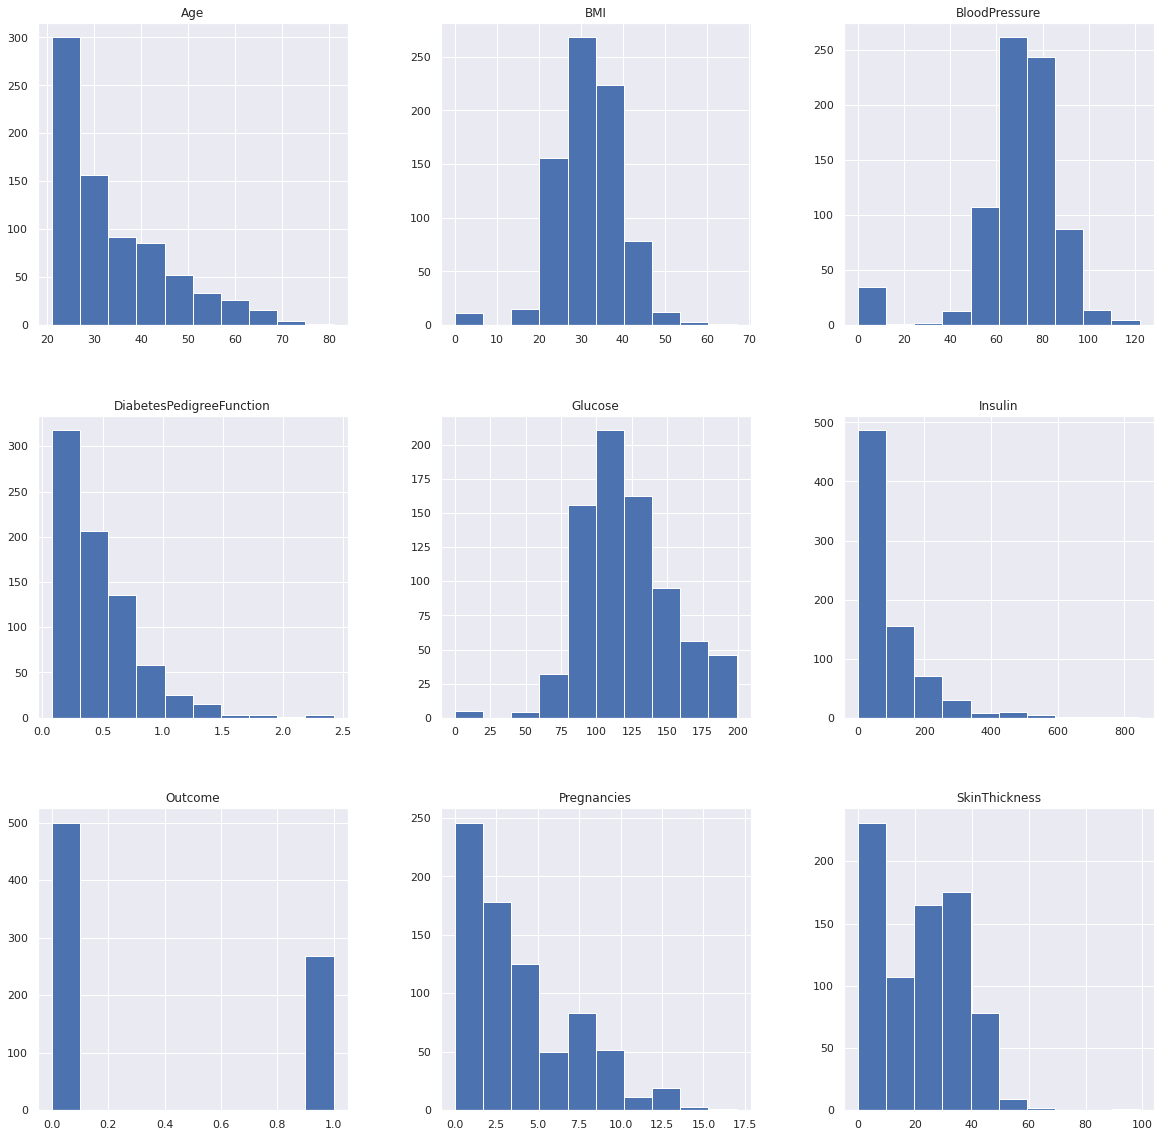

In [13]:
p = diabetes_data.hist(figsize = (20,20))

### Aiming to impute nan values for the columns in accordance with their distribution

In [14]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

## Plotting after Nan removal 

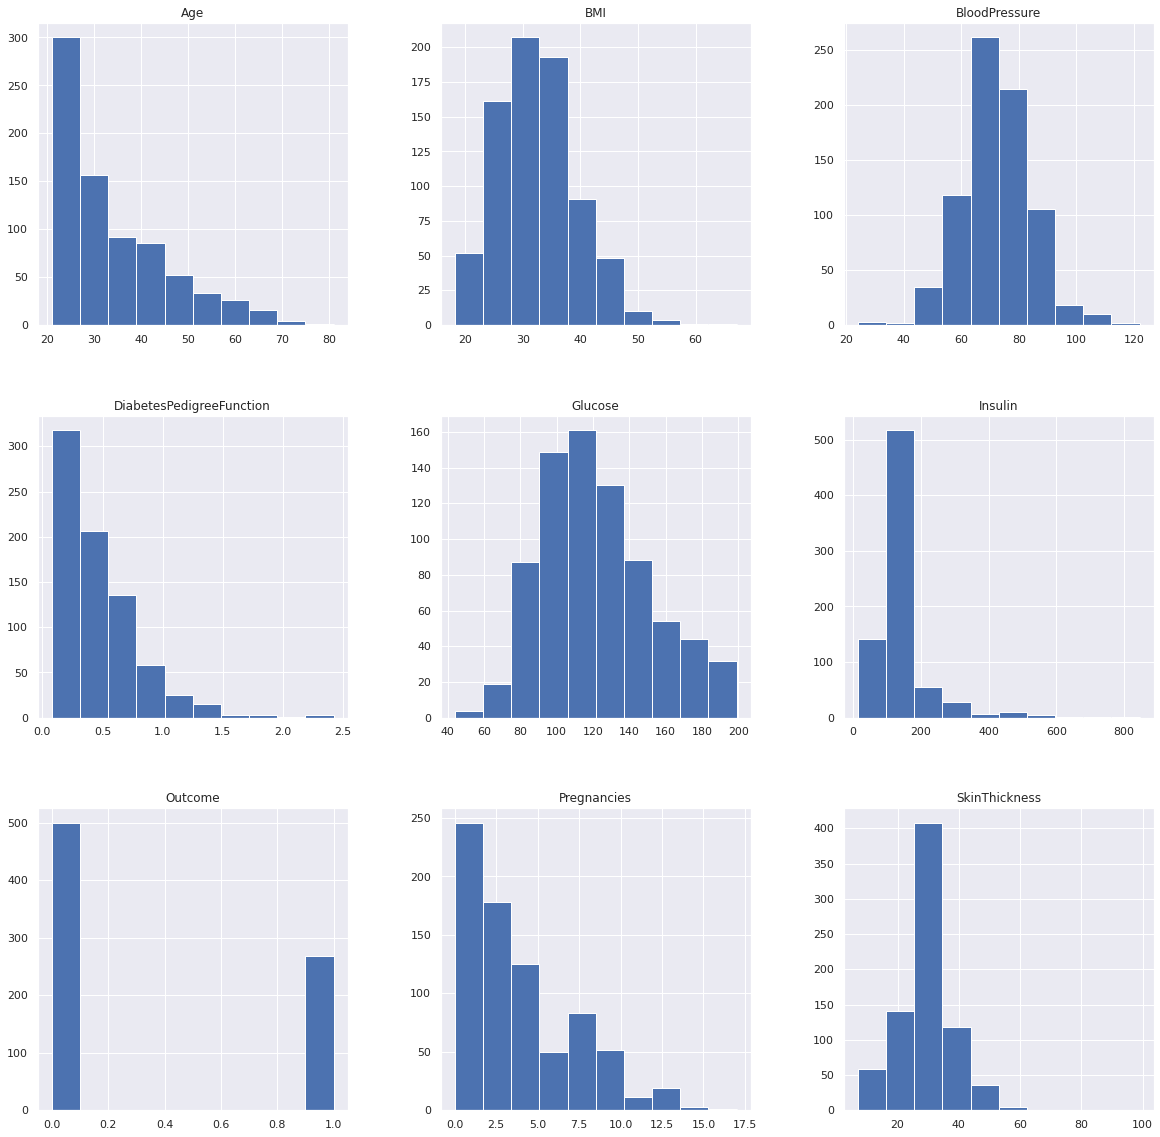

In [15]:
p = diabetes_data_copy.hist(figsize = (20,20))

## Skewness

A ***left-skewed distribution*** has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A ***right-skewed distribution*** has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.


![](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg)


#### to learn more about skewness
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

In [42]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

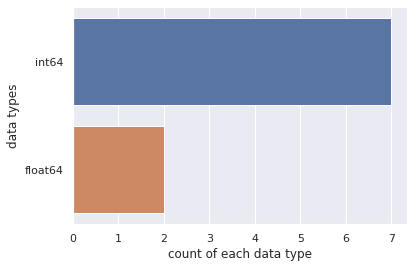

In [17]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)
#diabetes_data.dtypes.count
#sns.countplot(y=diabetes_data.dtypes, data=diabetes_data)

sns.countplot(y=diabetes_data.dtypes.map(str), data=diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

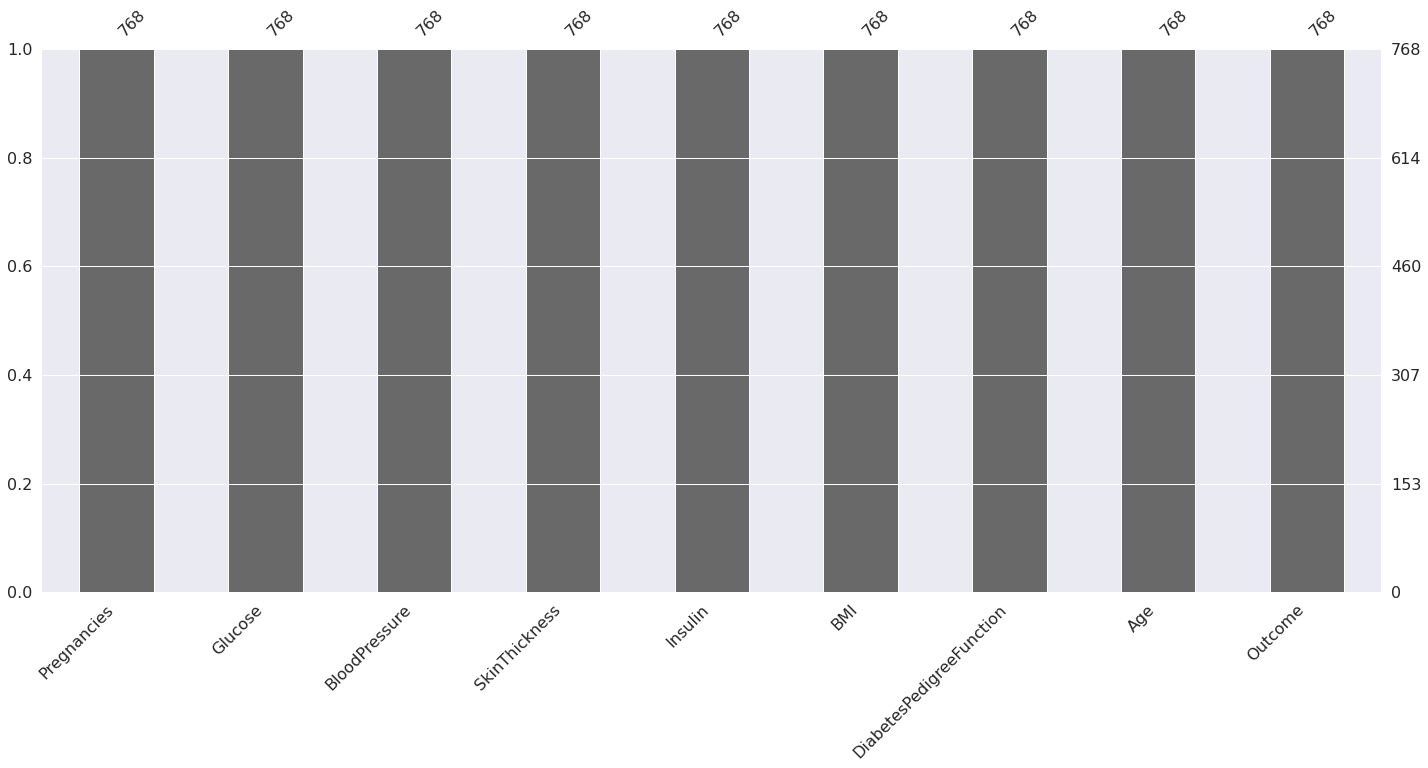

In [18]:
## null count analysis

import missingno as msno
p=msno.bar(diabetes_data)


0    500
1    268
Name: Outcome, dtype: int64


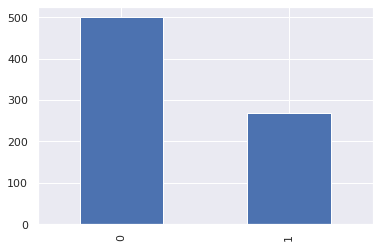

In [19]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")


#### The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

#### Scatter matrix of uncleaned data

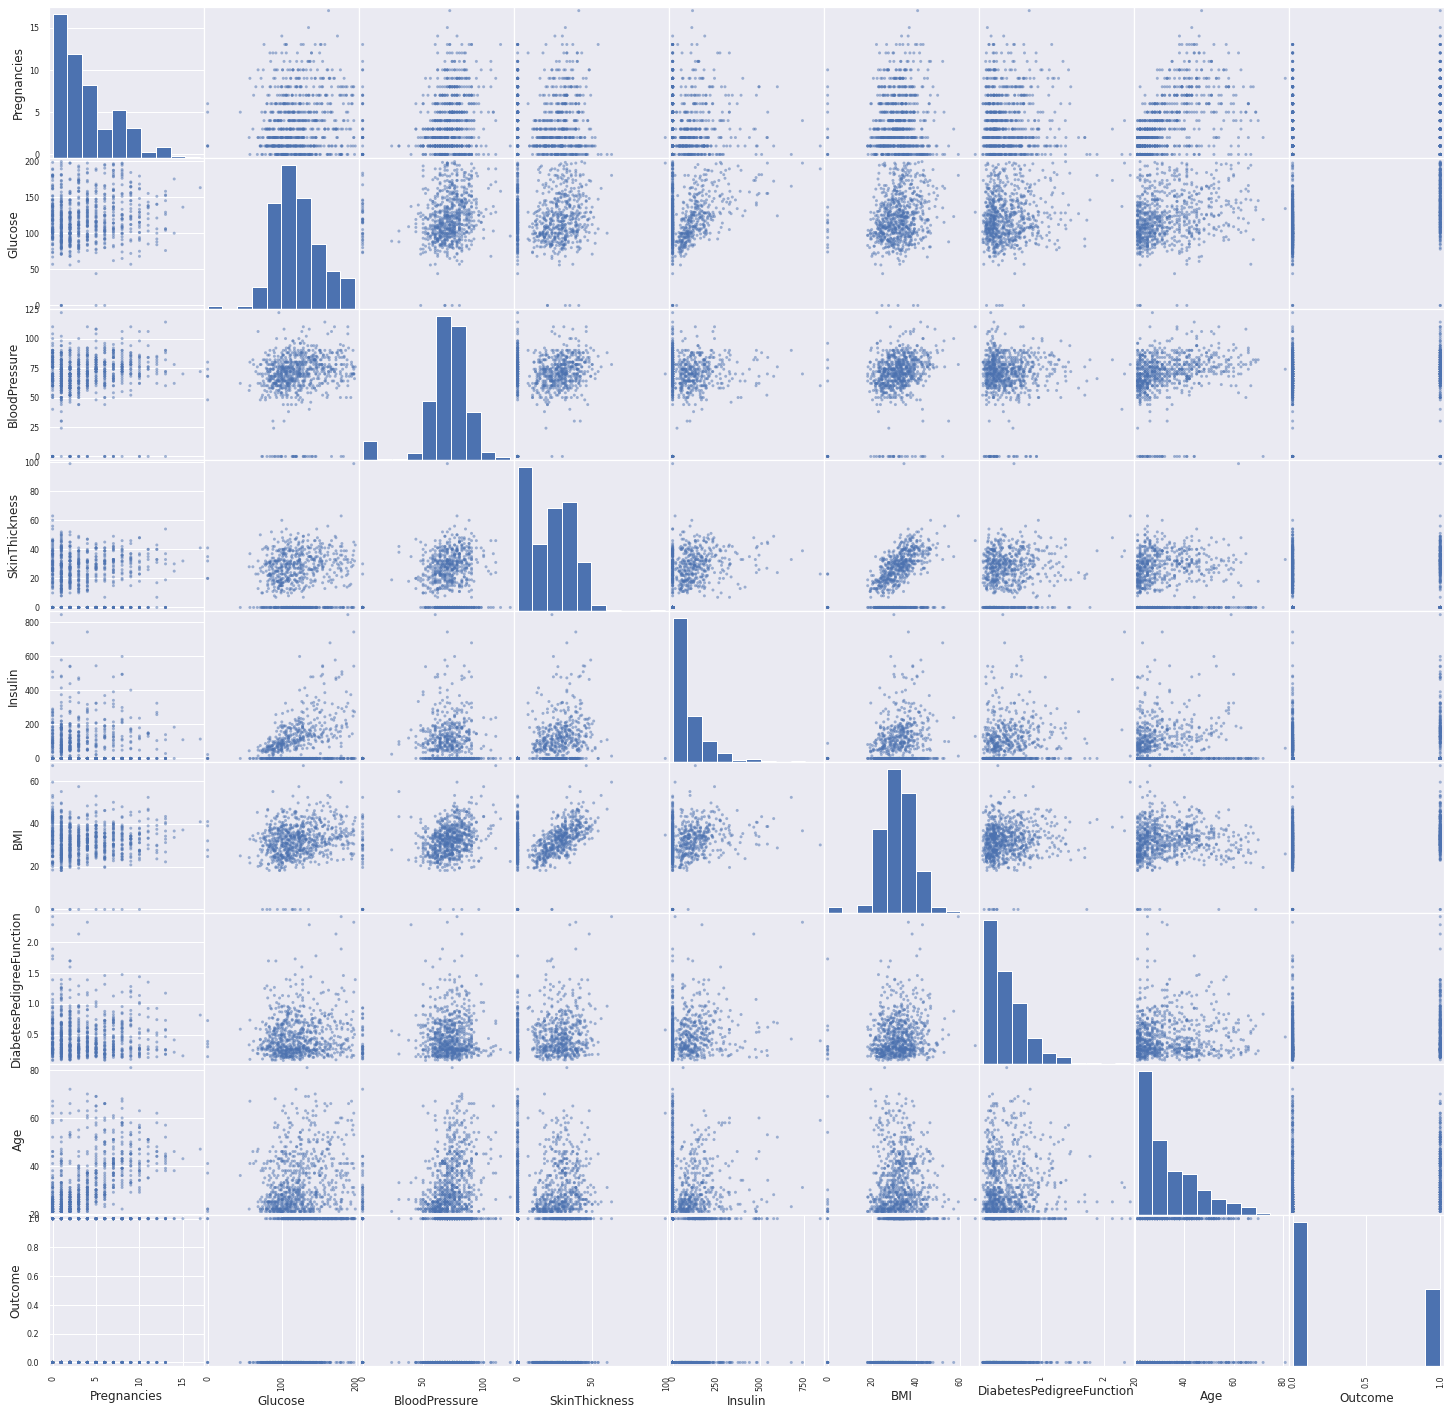

In [20]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_data,figsize=(25, 25))

###### The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

For Reference: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

#### Pair plot for clean data

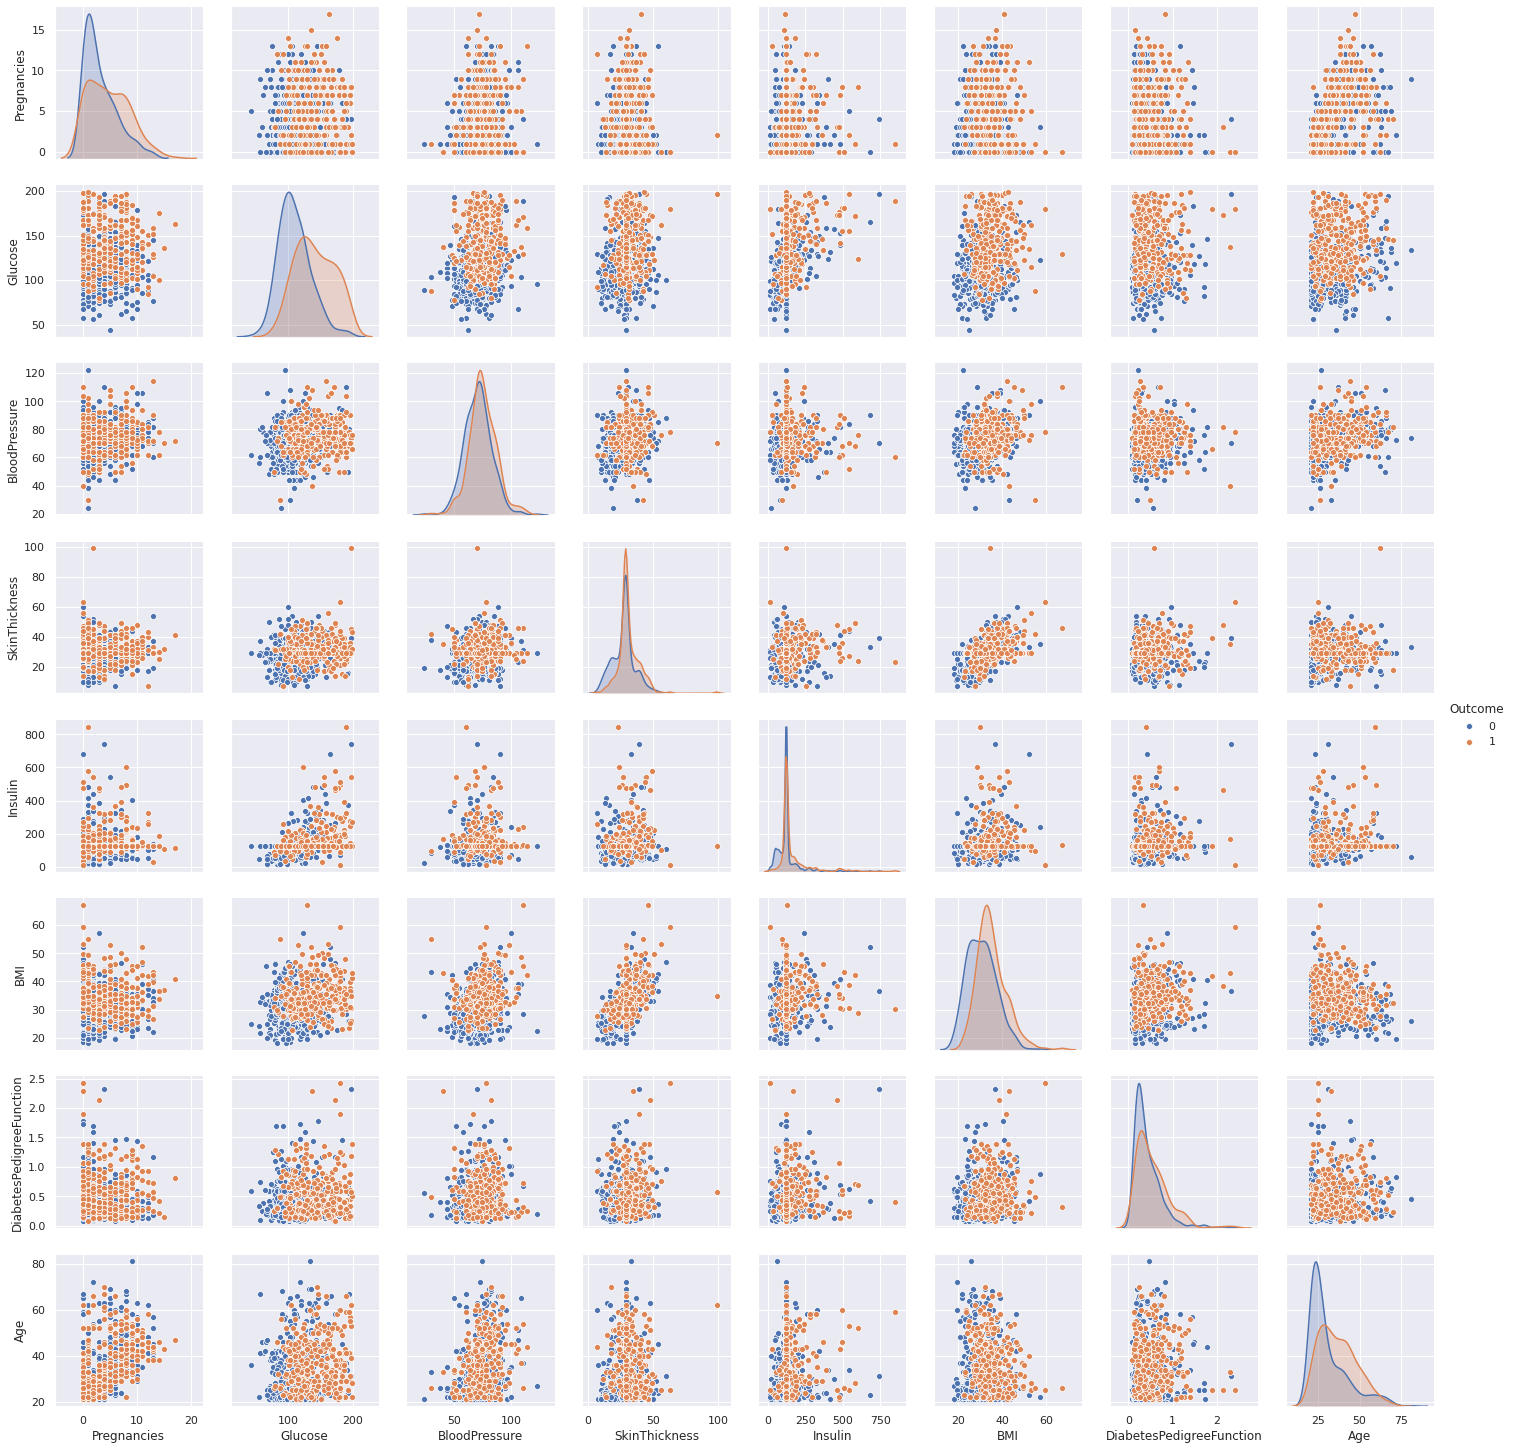

In [21]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

#### Heatmap for unclean data

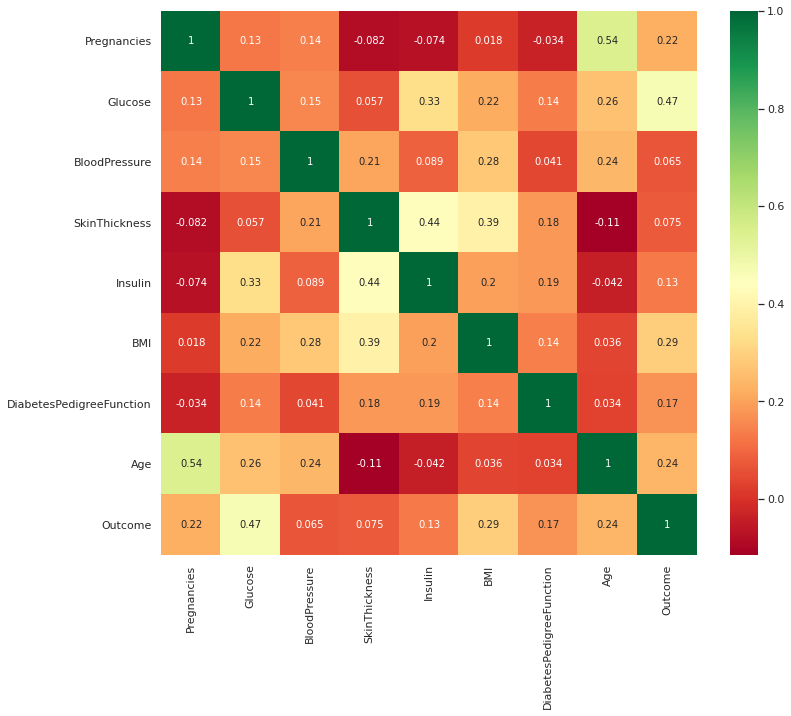

In [22]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

#### Heatmap for clean data

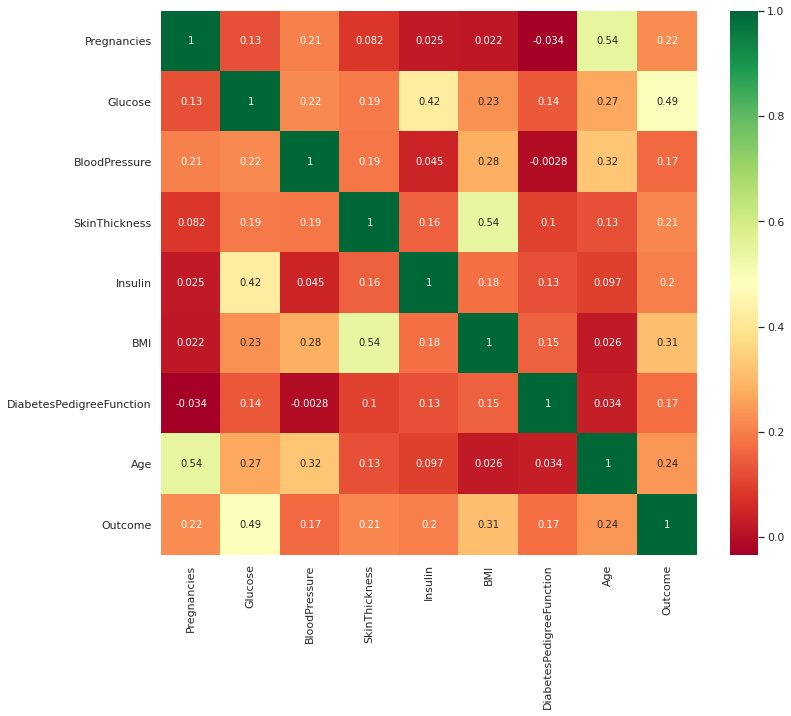

In [23]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

## Scaling the data 
data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this formula:
![](https://cdn-images-1.medium.com/max/800/0*PXGPVYIxyI_IEHP7.)


#### to learn more about scaling techniques
https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

In [24]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [25]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [26]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

## Test Train Split and Cross Validation methods



***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)

***Cross Validation***: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

![](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)


***About Stratify*** : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [27]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

Machine Learning Basics with the K-Nearest Neighbors Algorithm
Onel Harrison
Onel Harrison
Follow
Sep 11, 2018 · 9 min read

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. Pause! Let us unpack that.

ABC. We are keeping it super simple!
Breaking it down
A supervised machine learning algorithm (as opposed to an unsupervised machine learning algorithm) is one that relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data.
Imagine a computer is a child, we are its supervisor (e.g. parent, guardian, or teacher), and we want the child (computer) to learn what a pig looks like. We will show the child several different pictures, some of which are pigs and the rest could be pictures of anything (cats, dogs, etc).
When we see a pig, we shout “pig!” When it’s not a pig, we shout “no, not pig!” After doing this several times with the child, we show them a picture and ask “pig?” and they will correctly (most of the time) say “pig!” or “no, not pig!” depending on what the picture is. That is supervised machine learning.

“Pig!”
Supervised machine learning algorithms are used to solve classification or regression problems.
A classification problem has a discrete value as its output. For example, “likes pineapple on pizza” and “does not like pineapple on pizza” are discrete. There is no middle ground. The analogy above of teaching a child to identify a pig is another example of a classification problem.

Image showing randomly generated data
This image shows a basic example of what classification data might look like. We have a predictor (or set of predictors) and a label. In the image, we might be trying to predict whether someone likes pineapple (1) on their pizza or not (0) based on their age (the predictor).
It is standard practice to represent the output (label) of a classification algorithm as an integer number such as 1, -1, or 0. In this instance, these numbers are purely representational. Mathematical operations should not be performed on them because doing so would be meaningless. Think for a moment. What is “likes pineapple” + “does not like pineapple”? Exactly. We cannot add them, so we should not add their numeric representations.
A regression problem has a real number (a number with a decimal point) as its output. For example, we could use the data in the table below to estimate someone’s weight given their height.

Image showing a portion of the SOCR height and weights data set
Data used in a regression analysis will look similar to the data shown in the image above. We have an independent variable (or set of independent variables) and a dependent variable (the thing we are trying to guess given our independent variables). For instance, we could say height is the independent variable and weight is the dependent variable.
Also, each row is typically called an example, observation, or data point, while each column (not including the label/dependent variable) is often called a predictor, dimension, independent variable, or feature.
An unsupervised machine learning algorithm makes use of input data without any labels —in other words, no teacher (label) telling the child (computer) when it is right or when it has made a mistake so that it can self-correct.
Unlike supervised learning that tries to learn a function that will allow us to make predictions given some new unlabeled data, unsupervised learning tries to learn the basic structure of the data to give us more insight into the data.
K-Nearest Neighbors
The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
“Birds of a feather flock together.”

Image showing how similar data points typically exist close to each other
Notice in the image above that most of the time, similar data points are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.
Note: An understanding of how we calculate the distance between points on a graph is necessary before moving on. If you are unfamiliar with or need a refresher on how this calculation is done, thoroughly read “Distance Between 2 Points” in its entirety, and come right back.
There are other ways of calculating distance, and one way might be preferable depending on the problem we are solving. However, the straight-line distance (also called the Euclidean distance) is a popular and familiar choice.
The KNN Algorithm
Load the data
Initialize K to your chosen number of neighbors
3. For each example in the data
3.1 Calculate the distance between the query example and the current example from the data.
3.2 Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels
The KNN implementation (from scratch)

Choosing the right value for K
To select the K that’s right for your data, we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.
Here are some things to keep in mind:
As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green.
Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.
In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker.
Advantages
The algorithm is simple and easy to implement.
There’s no need to build a model, tune several parameters, or make additional assumptions.
The algorithm is versatile. It can be used for classification, regression, and search (as we will see in the next section).
Disadvantages
The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.
KNN in practice
KNN’s main disadvantage of becoming significantly slower as the volume of data increases makes it an impractical choice in environments where predictions need to be made rapidly. Moreover, there are faster algorithms that can produce more accurate classification and regression results.
However, provided you have sufficient computing resources to speedily handle the data you are using to make predictions, KNN can still be useful in solving problems that have solutions that depend on identifying similar objects. An example of this is using the KNN algorithm in recommender systems, an application of KNN-search.
Recommender Systems
At scale, this would look like recommending products on Amazon, articles on Medium, movies on Netflix, or videos on YouTube. Although, we can be certain they all use more efficient means of making recommendations due to the enormous volume of data they process.
However, we could replicate one of these recommender systems on a smaller scale using what we have learned here in this article. Let us build the core of a movies recommender system.
What question are we trying to answer?
Given our movies data set, what are the 5 most similar movies to a movie query?
Gather movies data
If we worked at Netflix, Hulu, or IMDb, we could grab the data from their data warehouse. Since we don’t work at any of those companies, we have to get our data through some other means. We could use some movies data from the UCI Machine Learning Repository, IMDb’s data set, or painstakingly create our own.
Explore, clean, and prepare the data
Wherever we obtained our data, there may be some things wrong with it that we need to correct to prepare it for the KNN algorithm. For example, the data may not be in the format that the algorithm expects, or there may be missing values that we should fill or remove from the data before piping it into the algorithm.
Our KNN implementation above relies on structured data. It needs to be in a table format. Additionally, the implementation assumes that all columns contain numerical data and that the last column of our data has labels that we can perform some function on. So, wherever we got our data from, we need to make it conform to these constraints.
The data below is an example of what our cleaned data might resemble. The data contains thirty movies, including data for each movie across seven genres and their IMDB ratings. The labels column has all zeros because we aren’t using this data set for classification or regression.

Self-made movies recommendation data set
Additionally, there are relationships among the movies that will not be accounted for (e.g. actors, directors, and themes) when using the KNN algorithm simply because the data that captures those relationships are missing from the data set. Consequently, when we run the KNN algorithm on our data, similarity will be based solely on the included genres and the IMDB ratings of the movies.
Use the algorithm
Imagine for a moment. We are navigating the MoviesXb website, a fictional IMDb spin-off, and we encounter The Post. We aren’t sure we want to watch it, but its genres intrigue us; we are curious about other similar movies. We scroll down to the “More Like This” section to see what recommendations MoviesXb will make, and the algorithmic gears begin to turn.
The MoviesXb website sends a request to its back-end for the 5 movies that are most similar to The Post. The back-end has a recommendation data set exactly like ours. It begins by creating the row representation (better known as a feature vector) for The Post, then it runs a program similar to the one below to search for the 5 movies that are most similar to The Post, and finally sends the results back to the MoviesXb website.

When we run this program, we see that MoviesXb recommends 12 Years A Slave, Hacksaw Ridge, Queen of Katwe, The Wind Rises, and A Beautiful Mind. Now that we fully understand how the KNN algorithm works, we are able to exactly explain how the KNN algorithm came to make these recommendations. Congratulations!
Summary
The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It’s easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.
KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).
In the case of classification and regression, we saw that choosing the right K for our data is done by trying several Ks and picking the one that works best.
Finally, we looked at an example of how the KNN algorithm could be used in recommender systems, an application of KNN-search.

In [43]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [44]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [45]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 76.5625 % and k = [11]


## Result Visualisation

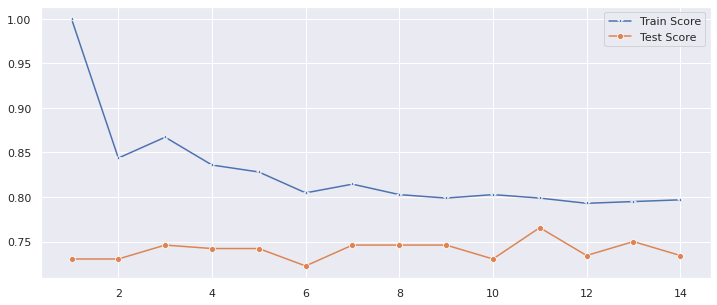

In [31]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

#### The best result is captured at k = 11 hence 11 is used for the final model

In [32]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

In [33]:
## trying to plot decision boundary 

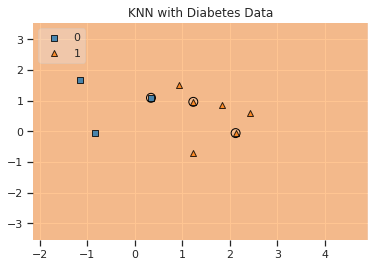

In [34]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

# Model Performance Analysis

## 1. Confusion Matrix

The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.
![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)



### ***In the famous cancer example***:


###### Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.

###### Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.

###### Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.

###### Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.

![](https://cdn-images-1.medium.com/max/1600/0*9r99oJ2PTRi4gYF_.jpg)

For Reference: https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327

In [35]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


Text(0.5, 12.5, 'Predicted label')

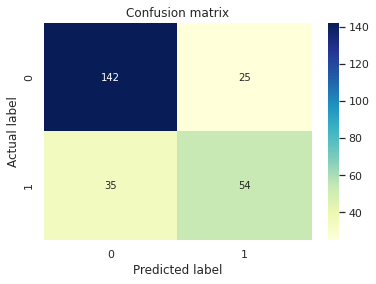

In [36]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 2. Classification Report

Report which includes Precision, Recall and F1-Score.


#### Precision Score
        TP – True Positives
        FP – False Positives

        Precision – Accuracy of positive predictions.
        Precision = TP/(TP + FP)
        
   
#### Recall Score
        FN – False Negatives

        Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
        Recall = TP/(TP+FN)
        
#### F1 Score
        F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
        F1 Score takes into account precision and the recall. 
        It is created by finding the the harmonic mean of precision and recall.

        F1 = 2 x (precision x recall)/(precision + recall)
        
        
        
> > ***Precision*** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.
> > 
> > Precision = TP/TP+FP
> > 
> > ***Recall (Sensitivity)*** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.
> > 
> > Recall = TP/TP+FN
> > 
> > ***F1 score*** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 
> > 
> > F1 Score = 2*(Recall * Precision) / (Recall + Precision)
        
        
For Reference: http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/
                        : https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

In [37]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



## 3. ROC - AUC
ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two


Well Explained in this video: https://www.youtube.com/watch?v=OAl6eAyP-yo



In [38]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

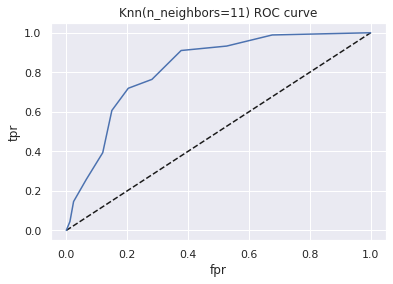

In [39]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [40]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8193500639171096

# Hyper Parameter optimization
Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. 

Let’s consider the following example: 

Suppose, a machine learning model X takes hyperparameters a1, a2 and a3. In grid searching, you first define the range of values for each of the hyperparameters a1, a2 and a3. You can think of this as an array of values for each of the hyperparameters. Now the grid search technique will construct many versions of X with all the possible combinations of hyperparameter (a1, a2 and a3) values that you defined in the first place. This range of hyperparameter values is referred to as the grid. 

Suppose, you defined the grid as:
a1 = [0,1,2,3,4,5]
a2 = [10,20,30,40,5,60]
a3 = [105,105,110,115,120,125]

Note that, the array of values of that you are defining for the hyperparameters has to be legitimate in a sense that you cannot supply Floating type values to the array if the hyperparameter only takes Integer values.

Now, grid search will begin its process of constructing several versions of X with the grid that you just defined.

It will start with the combination of [0,10,105], and it will end with [5,60,125]. It will go through all the intermediate combinations between these two which makes grid search computationally very expensive.

In [41]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}


#### Don't forget to share and upvote if you found my notebook of use :)